# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Customer Segmentation</p>

<img src="https://github.com/KarnikaKapoor/Files/blob/main/Colorful%20Handwritten%20About%20Me%20Blank%20Education%20Presentation.gif?raw=true">

In this final project, an unsupervised clustering will be performed on the customer's records extracted into [`online_retail.xlsx`](https://github.com/thuynh386/olist_ecommerce_dataset/blob/master/online_retail_II.xlsx?raw=true). 
   <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Requirements</p>   
    
### 1. Import libraries

Import libraries that support the analysis and visualization of data, e.g. pandas, matplotlib, seaborn, sklearn, etc.

|Invoice|StockCode|	Description|	Quantity	|InvoiceDate|	Price|	Customer ID|	Country|
|-|-|	-|	-	|-|	-|	-|	-|
|0	|489434 |85048|	15CM CHRISTMAS GLASS BALL 20 LIGHTS	12	|2009-12-01 07:45:00	|6.95	|13085.0	|United Kingdom|
|1	|489434 |79323P|	PINK CHERRY LIGHTS	12|	2009-12-01 07:45:00|	6.75|	13085.0|	United Kingdom|

### 2. Load datasets

The dataset can be accessed [here](https://github.com/thuynh386/olist_ecommerce_dataset/blob/master/online_retail_II.xlsx?raw=true) and can be loaded from excel using pandas.
Further analysis can be performed on the dataset to discover the relationship between the features and the problem of features.
E.g:
- How many customers are there in the dataset?
- Describe the dataset with the necessary information?
- Is there any abnormal type for each feature?
- How many unique values are there in each feature?
- How many missing values are there in each feature?
- Are there any outliers in each feature?
    
### 3. Data cleaning and preprocessing 
- Remove the outliers if any.
- Remove the missing values if any.
- Convert the date to datetime format.
- Convert the quantity to numeric.
- Convert the customer id to numeric.
- Remove the duplicates and test data where StockCode is 'TEST' or 'M'.

### 4. Data visualization and analysis
- Visualize the data with the help of matplotlib and seaborn for the above analysis.

### 5. Feature creation
Create new features from the existing features to capture the RFM (Recency, Frequency, Monetary) of the customer.
- Create `StockValue` feature, which is the product of `Quantity` and `Price`.
- Create `Recency` feature, which is the difference between `InvoiceDate` and `InvoiceDate` of the last invoice.
- Create `Frequency` feature, which is the number of invoices of the customer.
- Create `Monetary` feature, which is the sum of `StockValue` of the invoices.
Make sure that the features are in the same scale in the dataset with no missing values or outliers.
    
### 6. Clustering with suitable algorithm
Perform clustering on the dataset using the algorithm that is suitable for the problem. E.g Kmeans, GMM, DBSCAN, etc.
In terms of K-means, make sure to find the optimal number of clusters using the elbow method.
Visualize the clusters using the above analysis. Examine the clusters formed via scatter plot.

### 7. Evaluate the clustering results and conclusion of the analysis (Important)

In [1]:
### 1

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [3]:
xl = pd.ExcelFile('online_retail.xlsx')
xl.sheet_names

['Year 2009-2010', 'Year 2010-2011']

In [4]:
data = pd.DataFrame([])
sheets = ['Year 2009-2010', 'Year 2010-2011']

for i in sheets:
    data = pd.concat([data,pd.read_excel('online_retail.xlsx',sheet_name=i)],ignore_index=True)
data.head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom


In [5]:
#2.1 How many customers are there in the dataset?
data['Customer ID'].nunique()

5942

In [6]:
data['Country'].unique()

array(['United Kingdom', 'France', 'USA', 'Belgium', 'Australia', 'EIRE',
       'Germany', 'Portugal', 'Japan', 'Denmark', 'Nigeria',
       'Netherlands', 'Poland', 'Spain', 'Channel Islands', 'Italy',
       'Cyprus', 'Greece', 'Norway', 'Austria', 'Sweden',
       'United Arab Emirates', 'Finland', 'Switzerland', 'Unspecified',
       'Malta', 'Bahrain', 'RSA', 'Bermuda', 'Hong Kong', 'Singapore',
       'Thailand', 'Israel', 'Lithuania', 'West Indies', 'Lebanon',
       'Korea', 'Brazil', 'Canada', 'Iceland', 'Saudi Arabia',
       'Czech Republic', 'European Community'], dtype=object)

In [7]:
# How many customers are there in the dataset?
data['Country'].nunique()

43

In [22]:
#2.2 Describe the dataset with the necessary information?

In [8]:
data.describe()

,Quantity,Price,Customer ID
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


In [9]:
data[data['Quantity']<0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
1065910,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
1067002,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
1067176,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
1067177,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [28]:
data[data['Quantity']<0].nunique()

Invoice        11684
StockCode       4089
Description     3300
Quantity         493
InvoiceDate    10709
Price           1006
Customer ID     2572
Country           36
dtype: int64

In [10]:
data[data['Price']<0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom
825444,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
825445,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [11]:
data[data['Price']<0].nunique()

Invoice        5
StockCode      1
Description    1
Quantity       1
InvoiceDate    5
Price          4
Customer ID    0
Country        1
dtype: int64

In [12]:
data[['StockCode','Description','Country']].describe()

,StockCode,Description,Country
count,1067371,1062989,1067371
unique,5305,5698,43
top,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,5829,5918,981330


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


In [14]:
data.isna().sum()/len(data)

Invoice        0.000000
StockCode      0.000000
Description    0.004105
Quantity       0.000000
InvoiceDate    0.000000
Price          0.000000
Customer ID    0.227669
Country        0.000000
dtype: float64

In [15]:
data.nunique()

Invoice        53628
StockCode       5305
Description     5698
Quantity        1057
InvoiceDate    47635
Price           2807
Customer ID     5942
Country           43
dtype: int64

<AxesSubplot:>

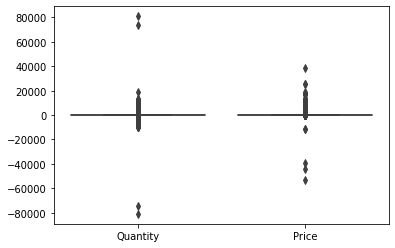

In [16]:
sns.boxplot(data=data[['Quantity','Price']])

In [17]:
data.duplicated().sum()

34335

In [18]:
data[data['StockCode'].isin(['TEST','M'])]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2697,489609,M,Manual,1,2009-12-01 14:50:00,4.00,NaN,United Kingdom
3053,C489651,M,Manual,-1,2009-12-01 16:48:00,5.10,17804.0,United Kingdom
5897,C489859,M,Manual,-1,2009-12-02 14:45:00,69.57,NaN,United Kingdom
9259,C490126,M,Manual,-1,2009-12-03 18:12:00,5.95,15884.0,United Kingdom
9307,C490129,M,Manual,-1,2009-12-03 18:26:00,1998.49,15482.0,United Kingdom
...,...,...,...,...,...,...,...,...
1056893,580956,M,Manual,4,2011-12-06 14:23:00,1.25,17841.0,United Kingdom
1058543,C581009,M,Manual,-1,2011-12-07 09:15:00,125.00,16971.0,United Kingdom
1059769,C581145,M,Manual,-1,2011-12-07 13:48:00,9.95,17490.0,United Kingdom
1063782,581405,M,Manual,3,2011-12-08 13:50:00,0.42,13521.0,United Kingdom


In [19]:
q1 = data['Quantity'].quantile(0.25)
q2 = data['Quantity'].quantile(0.75)
IQR = q2 - q1
IQR

9.0

In [20]:
max_limit = q2 + 1.5*IQR
min_limit = q1 - 1.5*IQR

In [21]:
data['Quantity_R0']=pd.DataFrame(np.where(data['Quantity']>max_limit,max_limit,(np.where(data['Quantity']<min_limit,min_limit,data['Quantity']))))
data.head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Quantity_R0
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,12.0
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,12.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,12.0


<AxesSubplot:>

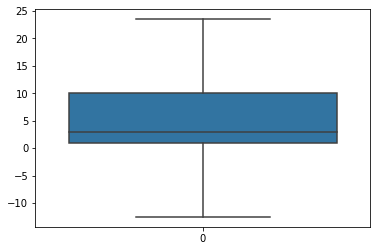

In [22]:
sns.boxplot(data=data['Quantity_R0'])

In [23]:
q1 = data['Price'].quantile(0.25)
q2 = data['Price'].quantile(0.75)
IQR = q2 - q1
IQR
max_limit = q2 + 1.5*IQR
min_limit = q1 - 1.5*IQR

data['Price_R0']=pd.DataFrame(np.where(data['Price']>max_limit,max_limit,(np.where(data['Price']<min_limit,min_limit,data['Price']))))
data.head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Quantity_R0,Price_R0
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,12.0,6.95
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,12.0,6.75
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,12.0,6.75


<AxesSubplot:>

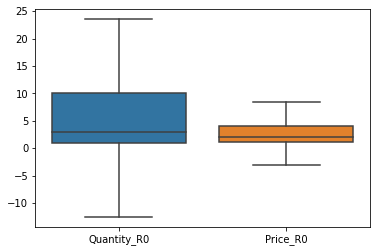

In [24]:
sns.boxplot(data=data[['Quantity_R0','Price_R0']])

In [25]:
data2 = data.dropna(subset=['Customer ID'])
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 824364 entries, 0 to 1067370
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      824364 non-null  object        
 1   StockCode    824364 non-null  object        
 2   Description  824364 non-null  object        
 3   Quantity     824364 non-null  int64         
 4   InvoiceDate  824364 non-null  datetime64[ns]
 5   Price        824364 non-null  float64       
 6   Customer ID  824364 non-null  float64       
 7   Country      824364 non-null  object        
 8   Quantity_R0  824364 non-null  float64       
 9   Price_R0     824364 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 69.2+ MB


In [26]:
data2['Quantity_R0'] = data2['Quantity_R0'].astype('int64')
data2['Customer ID'] = data2['Customer ID'].astype('int64')

C:\Users\mrhuy\AppData\Local\Temp\ipykernel_2000\2964204570.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Quantity_R0'] = data2['Quantity_R0'].astype('int64')
C:\Users\mrhuy\AppData\Local\Temp\ipykernel_2000\2964204570.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Customer ID'] = data2['Customer ID'].astype('int64')


In [27]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 824364 entries, 0 to 1067370
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      824364 non-null  object        
 1   StockCode    824364 non-null  object        
 2   Description  824364 non-null  object        
 3   Quantity     824364 non-null  int64         
 4   InvoiceDate  824364 non-null  datetime64[ns]
 5   Price        824364 non-null  float64       
 6   Customer ID  824364 non-null  int64         
 7   Country      824364 non-null  object        
 8   Quantity_R0  824364 non-null  int64         
 9   Price_R0     824364 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 69.2+ MB


In [28]:
data2.drop_duplicates()
data2=data2[~data2['StockCode'].isin(['TEST','M'])]
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 823249 entries, 0 to 1067370
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      823249 non-null  object        
 1   StockCode    823249 non-null  object        
 2   Description  823249 non-null  object        
 3   Quantity     823249 non-null  int64         
 4   InvoiceDate  823249 non-null  datetime64[ns]
 5   Price        823249 non-null  float64       
 6   Customer ID  823249 non-null  int64         
 7   Country      823249 non-null  object        
 8   Quantity_R0  823249 non-null  int64         
 9   Price_R0     823249 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 69.1+ MB


In [29]:
data2=data2[data2['StockCode'].isin(['TEST','M'])]
data2

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Quantity_R0,Price_R0
